#**Moore Law Prediction**
Moore's Law is an observation made by Gordon Moore, co-founder of Intel, in a 1965 paper. He noticed that the number of transistors per square inch on integrated circuits had doubled every year since their invention. Moore predicted that this trend would continue into the foreseeable future.
In 1975, Moore revised his prediction, stating that the doubling would occur every two years. Despite the common misconception, Moore's Law is not a physical or natural law but rather an observation and projection of a technological trend.

###*This Code helps to predict the certainity of Moore's Law and its future* ***Moore's Law and its future***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# https://www.karlrupp.net/2015/06/40-years-of-microprocessor-trend-data/

In [ ]:
df = pd.read_csv('40years-transistors.dat', header=None, delimiter=r"\s+")

In [ ]:
df.columns = ['year', 'Number']
df=df.dropna()
df.head()


,year,Number
0,1971.875,2.308242
1,1972.30769231,3.554522
2,1974.32692308,6.097562
3,1979.56730769,29.163776
4,1982.30769231,135.772714


In [ ]:
df.isnull().sum()

year      0
Number    0
dtype: int64

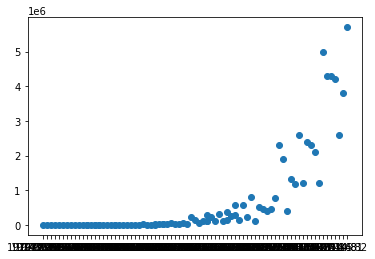

In [ ]:
plt.scatter(df['year'], df['Number'])

In [ ]:
import torch
import torch.nn as nn

In [ ]:
X = df['year']
Y = df['Number']

In [ ]:
Y

0     2.308242e+00
1     3.554522e+00
2     6.097562e+00
3     2.916378e+01
4     1.357727e+02
          ...     
83    4.300000e+06
84    4.200000e+06
85    2.600000e+06
86    3.800000e+06
87    5.700000e+06
Name: Number, Length: 87, dtype: float64

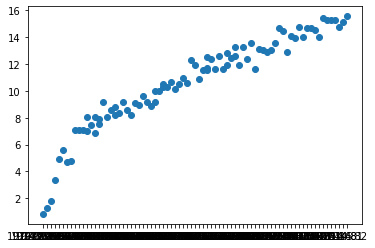

In [ ]:
plt.scatter(X,np.log(Y))

In [ ]:
Y = np.log(Y).astype(np.float32)
X =X.astype(np.float32)

In [ ]:
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X-mx)/sx
Y =(Y-my)/sy

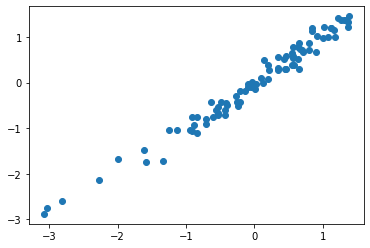

In [ ]:
plt.scatter(X,Y)

In [ ]:
model = nn.Linear(1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)
inputs = torch.from_numpy(X.values.reshape(-1,1))
targets = torch.from_numpy(Y.values.reshape(-1,1))


In [ ]:
n_epochs =100
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1} of {n_epochs}, loss: {loss.item():.4f}')


Epoch 1 of 100, loss: 1.6597
Epoch 2 of 100, loss: 1.5957
Epoch 3 of 100, loss: 1.4909
Epoch 4 of 100, loss: 1.3638
Epoch 5 of 100, loss: 1.2274
Epoch 6 of 100, loss: 1.0911
Epoch 7 of 100, loss: 0.9606
Epoch 8 of 100, loss: 0.8395
Epoch 9 of 100, loss: 0.7294
Epoch 10 of 100, loss: 0.6310
Epoch 11 of 100, loss: 0.5441
Epoch 12 of 100, loss: 0.4681
Epoch 13 of 100, loss: 0.4022
Epoch 14 of 100, loss: 0.3453
Epoch 15 of 100, loss: 0.2965
Epoch 16 of 100, loss: 0.2548
Epoch 17 of 100, loss: 0.2192
Epoch 18 of 100, loss: 0.1890
Epoch 19 of 100, loss: 0.1634
Epoch 20 of 100, loss: 0.1417
Epoch 21 of 100, loss: 0.1234
Epoch 22 of 100, loss: 0.1079
Epoch 23 of 100, loss: 0.0949
Epoch 24 of 100, loss: 0.0839
Epoch 25 of 100, loss: 0.0746
Epoch 26 of 100, loss: 0.0668
Epoch 27 of 100, loss: 0.0603
Epoch 28 of 100, loss: 0.0548
Epoch 29 of 100, loss: 0.0501
Epoch 30 of 100, loss: 0.0462
Epoch 31 of 100, loss: 0.0430
Epoch 32 of 100, loss: 0.0402
Epoch 33 of 100, loss: 0.0379
Epoch 34 of 100, lo

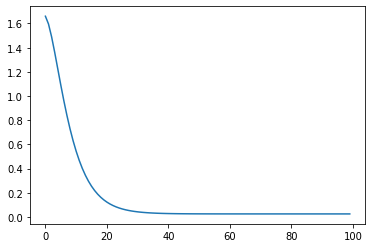

In [ ]:
plt.plot(losses)

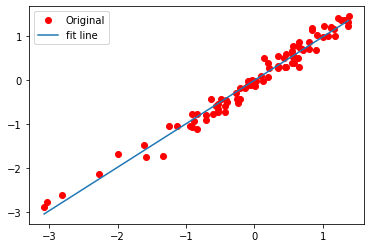

In [ ]:
predicted = model(torch.from_numpy(X.values.reshape(-1,1))).detach().numpy()
plt.plot(X,Y, 'ro', label ='Original')
plt.plot(X,predicted, label='fit line')
plt.legend()
plt.show()

In [ ]:
w = model.weight.data.numpy()
w

array([[0.9865628]], dtype=float32)